In [2]:
import mne 
import numpy as np
import matplotlib.pyplot as plt  

import fif Dataset : 

In [3]:
filepath = "E:\Computer\MNE\Code\Article7\s-raw.fif"
raw = mne.io.read_raw_fif(filepath,preload=True)

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\user\AppData\Local\Temp\ipykernel_22332\3554401938.py:1: SyntaxWarning: invalid escape sequence '\C'
  filepath = "E:\Computer\MNE\Code\Article7\s-raw.fif"


Opening raw data file E:\Computer\MNE\Code\Article7\s-raw.fif...
    Range : 0 ... 612999 =      0.000 ...  2451.996 secs
Ready.
Reading 0 ... 612999  =      0.000 ...  2451.996 secs...


In [4]:
raw.info

<Info | 10 non-empty values
 bads: []
 ch_names: CP1, CP2, Pz, POz, CPz, CP4, P1, P2
 chs: 8 EEG
 custom_ref_applied: False
 dig: 131 items (3 Cardinal, 128 EEG)
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 lowpass: 40.0 Hz
 meas_date: 2022-02-03 15:57:41 UTC
 meas_id: 4 items (dict)
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>

Events :


Used Annotations descriptions: ['feet', 'left_hand', 'rest', 'right_hand']
 events exist in Data :  {'feet': 1, 'left_hand': 2, 'rest': 3, 'right_hand': 4}
Using matplotlib as 2D backend.


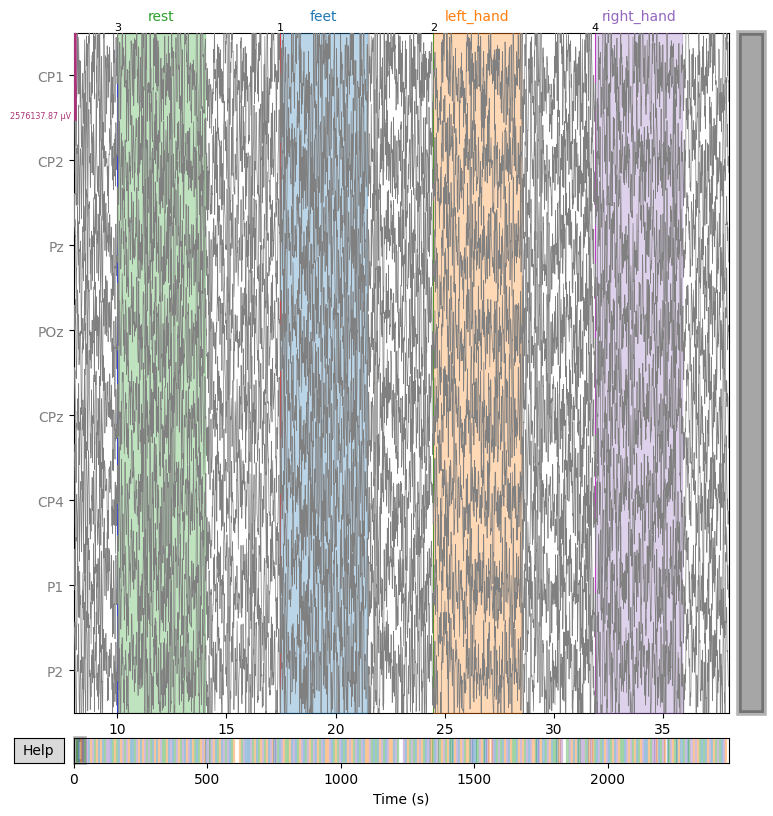

In [5]:
events, label = mne.events_from_annotations(raw)
print(f" events exist in Data :  {label}")
raw.plot(scalings ="auto", duration=30,start=8, events = events, color='grey', event_color={1: "r", 2:"g", 3:"b", 4:"m"})
plt.show()

Plotting : 

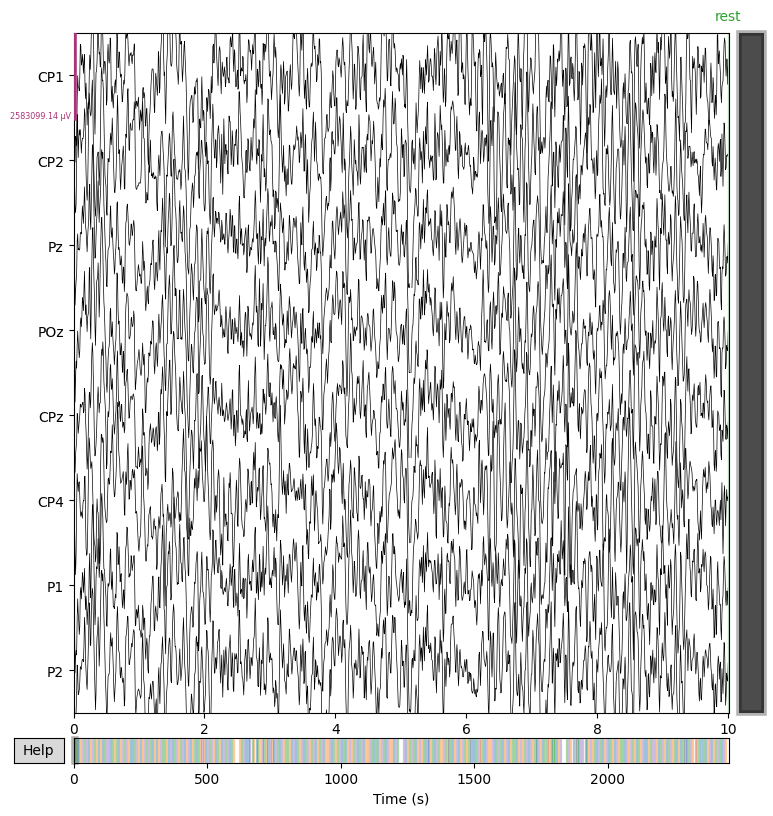

In [6]:
raw.plot(scalings = "auto")
plt.show()

Effective window size : 8.192 (s)


Plotting power spectral density (dB=True).


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


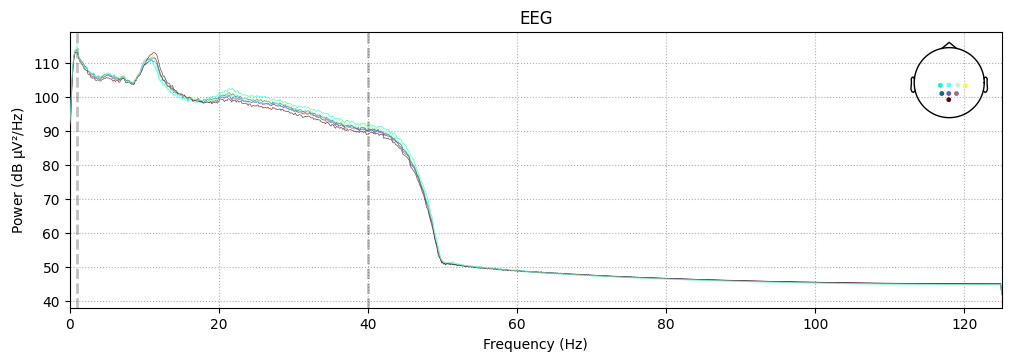

In [7]:
# Power Specral Density Plotting : 
spectrum = raw.compute_psd()
spectrum.plot()

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


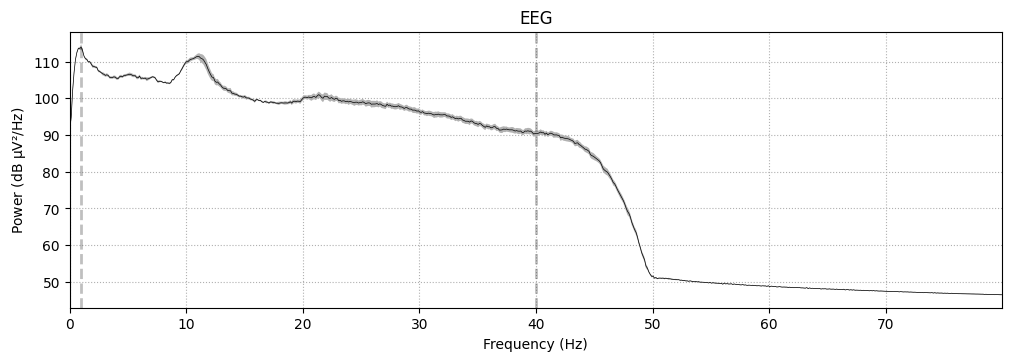

In [8]:
spectrum1 = raw.compute_psd(tmax=np.inf, fmax=80)

#  average PSD for 8 cahnnels : 

spectrum1.plot(average=True)

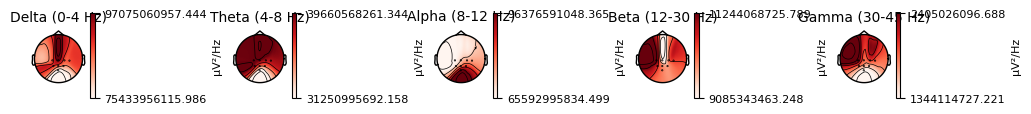

In [18]:
spectrum.plot_topomap()
plt.show()

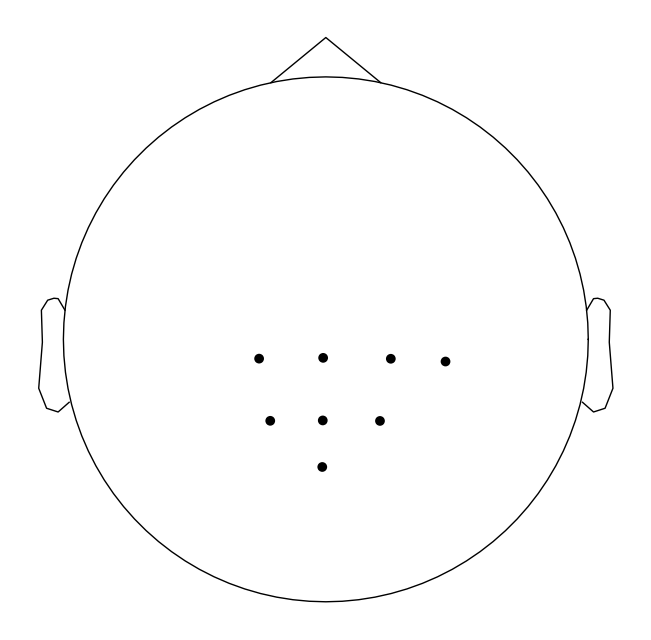

['CP1', 'CP2', 'Pz', 'POz', 'CPz', 'CP4', 'P1', 'P2']


In [10]:
# plotting Electrode locations : 
raw.plot_sensors(ch_type="eeg")

print(raw.info["ch_names"])    #  channel name

plt.show()


Filtering : 

In [11]:
# RuntimeError: By default, MNE does not load data into main memory to conserve resources. inst.filter requires raw data to be loaded. Use preload=True (or string) in the constructor or raw.load_data().

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 20.00
- Lower transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 17.50 Hz)
- Filter length: 165 samples (0.660 s)



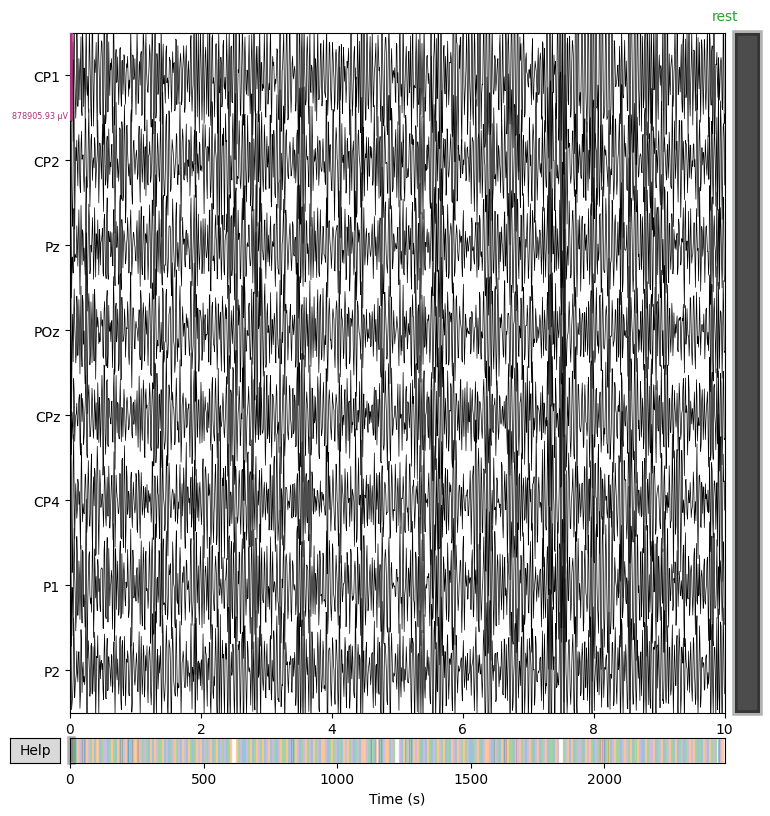

In [12]:
#High-pass filter

HPF_raw = raw.copy().filter(l_freq=20, h_freq=None,method="fir")
HPF_raw.plot( scalings="auto")
plt.show()

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 331 samples (1.324 s)



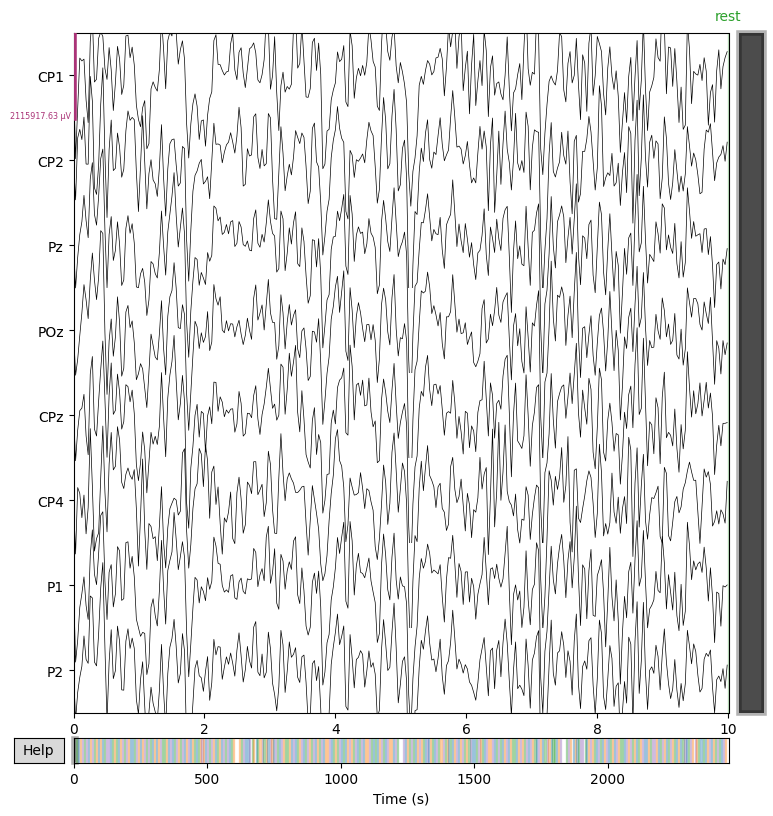

In [13]:
#Low-pass filter

LPF_raw = raw.copy().filter(l_freq=None, h_freq=10,method="fir")
LPF_raw.plot(scalings="auto")
plt.show()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 413 samples (1.652 s)



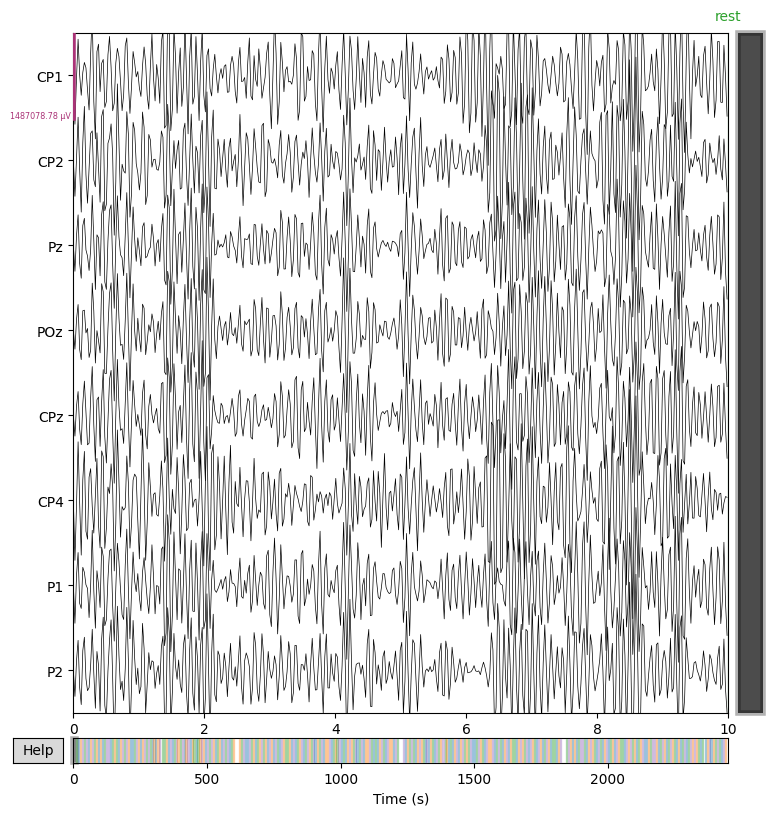

In [14]:
#Band-pass filter fir 
BPF_raw = raw.copy().filter(l_freq=8, h_freq=13,method="fir")
BPF_raw.plot( scalings="auto")
plt.show()

Resampling : 

In [15]:
raw.info["sfreq"]

250.0

Effective window size : 16.384 (s)
Plotting power spectral density (dB=True).


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


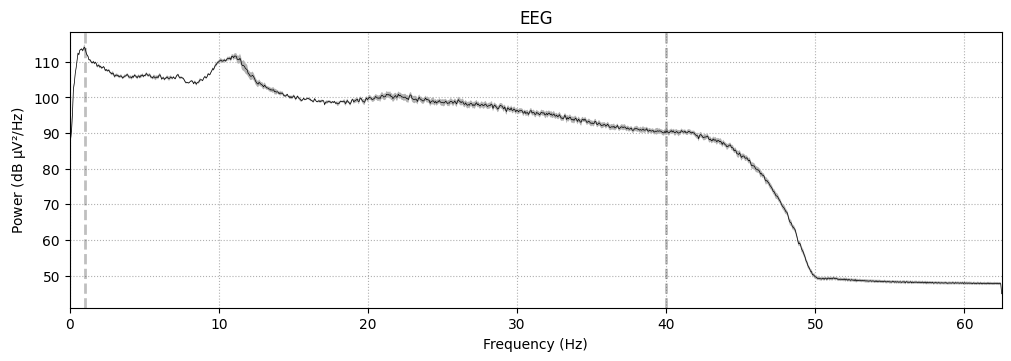

In [16]:
raw_downsampled = raw.copy().resample(sfreq=125)
raw_downsampled.compute_psd().plot(average = True)

Independent Components Analysis ( ICA ) : 

In [21]:
# first apply high-pass filter : 

filt_raw = raw.copy().filter(l_freq=1.0, h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



In [26]:
ica = mne.preprocessing.ICA(n_components=8, max_iter="auto", random_state=42)
ica.fit(filt_raw)
ica

Fitting ICA to data using 8 channels (please be patient, this may take a while)


Selecting by number: 8 components
Fitting ICA took 3.1s.


<ICA | raw data decomposition, method: fastica (fit in 16 iterations on 613000 samples), 8 ICA components (8 PCA components available), channel types: eeg, no sources marked for exclusion>

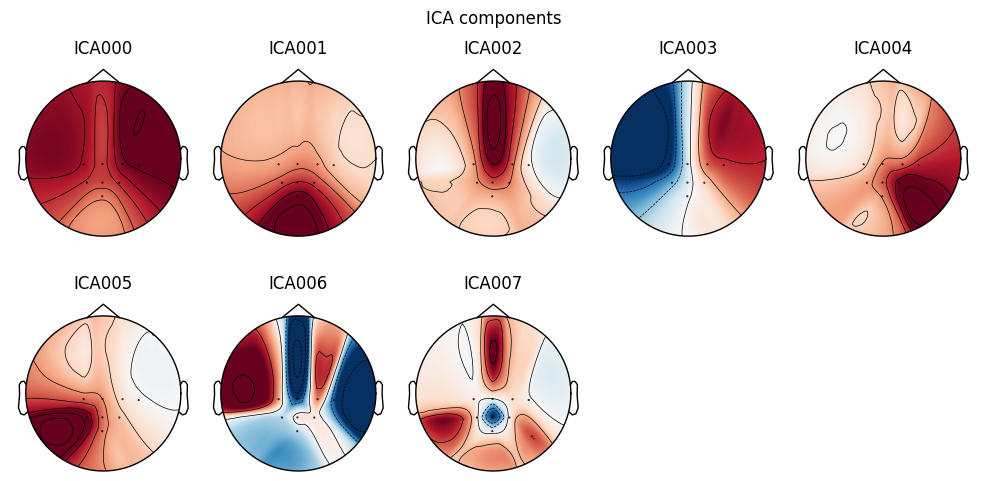

In [27]:
ica.plot_components()
plt.show()

Creating RawArray with float64 data, n_channels=8, n_times=613000
    Range : 0 ... 612999 =      0.000 ...  2451.996 secs
Ready.


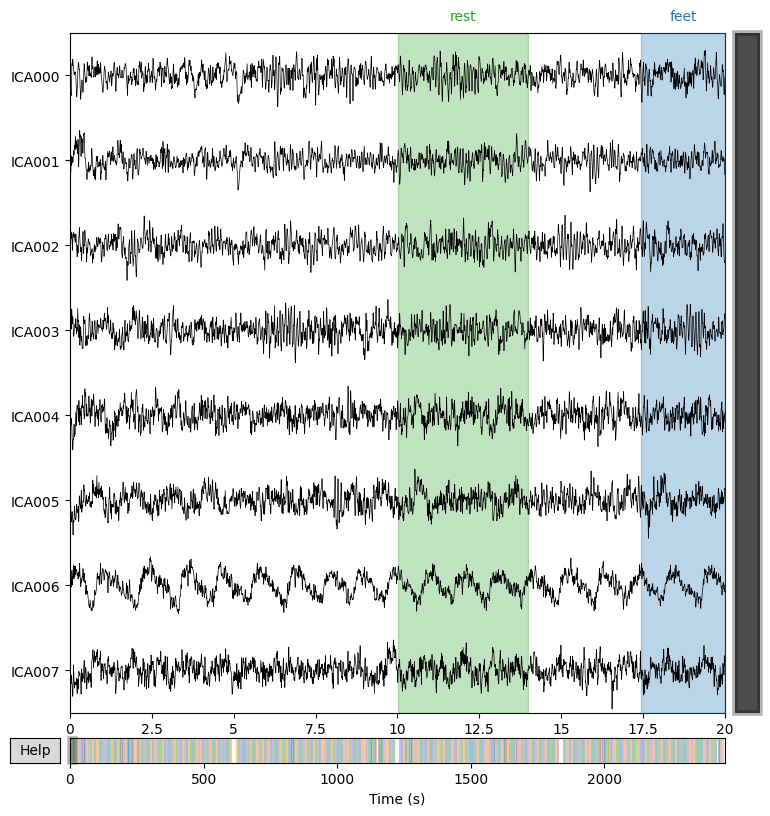

In [28]:
#scrolling ica component : 

ica.plot_sources(filt_raw)
plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1226 matching events found
No baseline correction applied
0 projection items activated


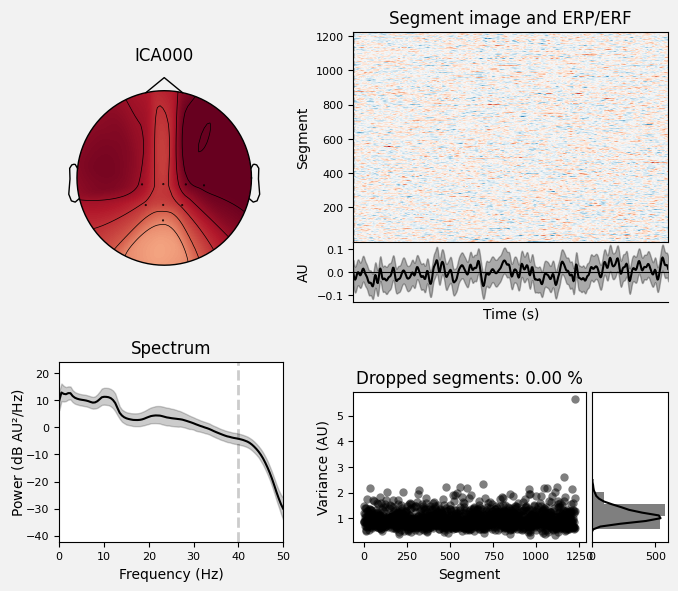

In [34]:
# see first component properties : 

ica.plot_properties(filt_raw,picks=[0])
plt.show()

In [37]:
# Removing ICA components : 

ica.exclude=[6]

# Recounstructing Time series :

new_raw=ica.apply(filt_raw)


Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 1 ICA component
    Projecting back using 8 PCA components


Set EEG Reference :  

In [38]:
raw.info["ch_names"]

['CP1', 'CP2', 'Pz', 'POz', 'CPz', 'CP4', 'P1', 'P2']

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


C:\Users\user\AppData\Local\Temp\ipykernel_22332\2962638800.py:1: RuntimeWarning: The locations of multiple reference channels are ignored.
  channel_ref = mne.add_reference_channels(raw, ref_channels=["P7"])


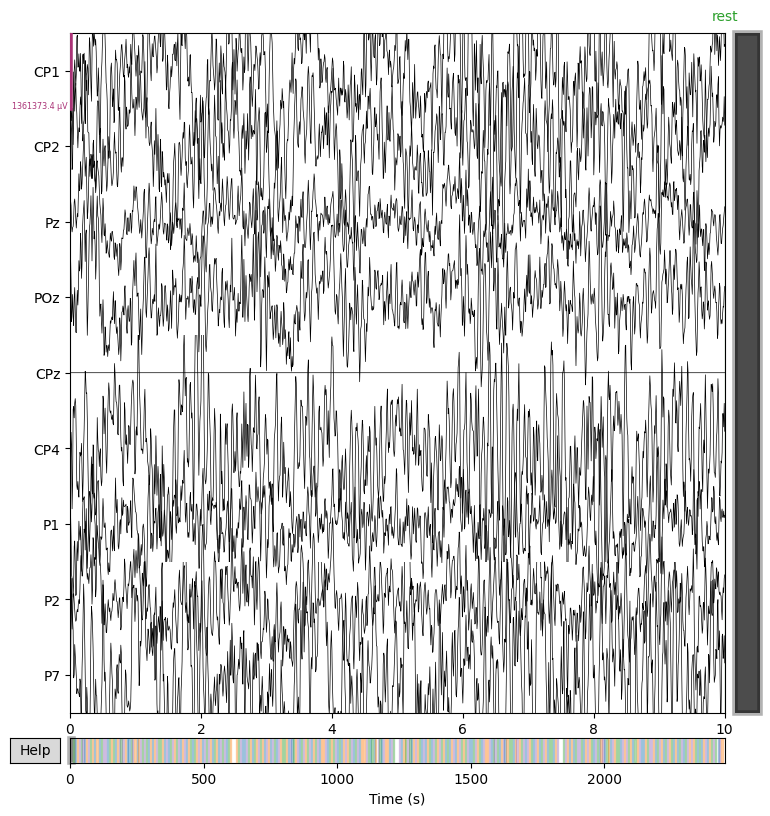

In [42]:
# using selective channel : 

channel_ref = mne.add_reference_channels(raw, ref_channels=["P7"])
channel_ref.set_eeg_reference(ref_channels=["CPz"])
channel_ref.plot(scalings="auto")
plt.show()

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


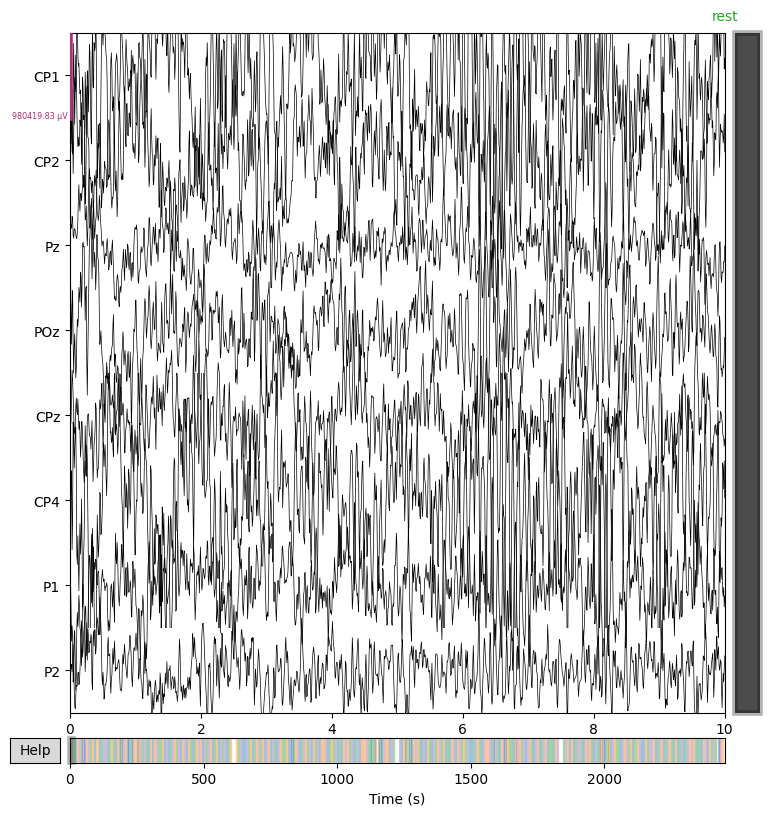

In [44]:
# using average : 

avg_ref = raw.copy().set_eeg_reference(ref_channels="average")
avg_ref.plot(scalings = "auto")
plt.show()

EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=1, n_times=613000
    Range : 0 ... 612999 =      0.000 ...  2451.996 secs


Ready.
Added the following bipolar channels:
CPz-P2


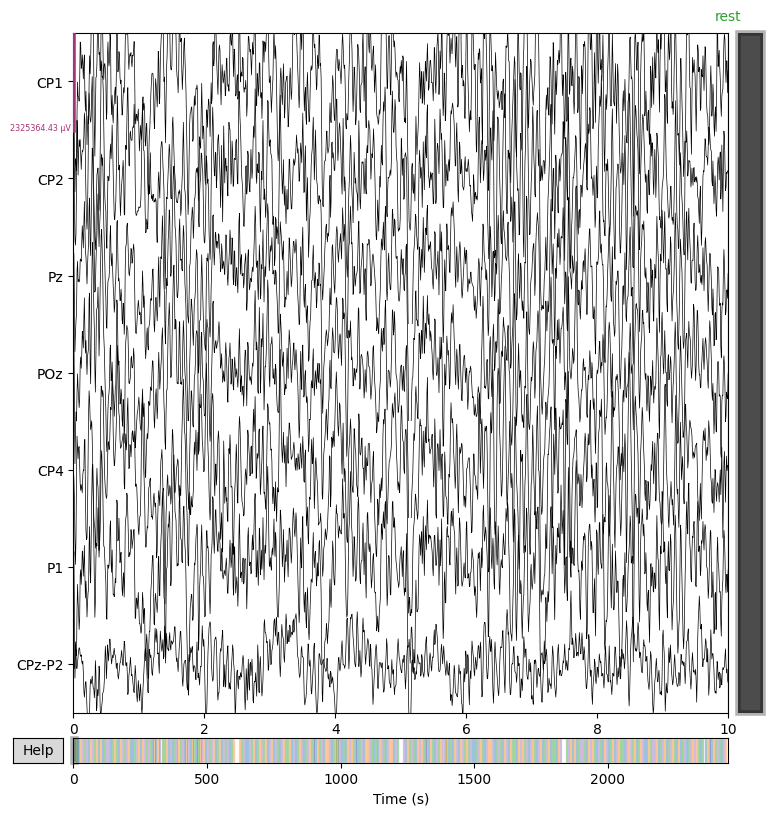

In [49]:
# using bipolar reference : 

bi_ref  = mne.set_bipolar_reference(raw , anode = ["CPz"], cathode =["P2"]  )
bi_ref.plot(scalings="auto")
plt.show()